In [1]:
# read in ASCII data
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import pickle
sys.path.append(os.environ['raco'])
from common import dotdict, g_univ
f = open("Model_S.txt", "r")
lines = f.readlines()
f.close()

In [2]:
# determine where data starts
lines[:10]

['L5BI.D.15.PRES.950912.AARHUS\n',
 'Level 5 physics, present Sun. (OPAL, LivermoreEOS ). He, Z diffusion.\n',
 'Model S (Christensen-Dalsgaard et al. 1996)\n',
 'https://phys.au.dk/~jcd/solar_models/\n',
 '\n',
 '      2482        15        25       210\n',
 ' 1.989000000E+33 6.959906258E+10 3.845999350E+33 1.962800000E-02 7.090812183E-01\n',
 ' 1.990493515E+00 2.249999861E+00 6.172840271E-03 1.000000000E+00 1.000000000E+00\n',
 '-1.370674456E+02-1.662854139E+02 4.600000017E+09 5.777503437E+03 6.672320000E-08\n',
 ' 6.964865599E+10 8.394798002E-11 4.348192658E+03 9.455873862E+02 3.292484968E-09\n']

In [3]:
lines[6:10]

[' 1.989000000E+33 6.959906258E+10 3.845999350E+33 1.962800000E-02 7.090812183E-01\n',
 ' 1.990493515E+00 2.249999861E+00 6.172840271E-03 1.000000000E+00 1.000000000E+00\n',
 '-1.370674456E+02-1.662854139E+02 4.600000017E+09 5.777503437E+03 6.672320000E-08\n',
 ' 6.964865599E+10 8.394798002E-11 4.348192658E+03 9.455873862E+02 3.292484968E-09\n']

In [4]:
lines[6].split()

['1.989000000E+33',
 '6.959906258E+10',
 '3.845999350E+33',
 '1.962800000E-02',
 '7.090812183E-01']

In [5]:
# actually doesn't work because the negative values "touch" values to their left
# maybe just split things up by each number (has character width 16)
st = ''
for line in lines[6:]: 
    st += line.replace('\n', '')
len(st)/16

62065.0

In [6]:
ndata = 62065
data = []
for i in range(ndata):
    data.append(float(st[16*i:16*(i+1)]))
data = np.array(data)
print(len(data))

62065


In [7]:
# compare first and last data vals
print (lines[6:8])
print (data[:10])

[' 1.989000000E+33 6.959906258E+10 3.845999350E+33 1.962800000E-02 7.090812183E-01\n', ' 1.990493515E+00 2.249999861E+00 6.172840271E-03 1.000000000E+00 1.000000000E+00\n']
[1.98900000e+33 6.95990626e+10 3.84599935e+33 1.96280000e-02
 7.09081218e-01 1.99049352e+00 2.24999986e+00 6.17284027e-03
 1.00000000e+00 1.00000000e+00]


In [8]:
print (lines[-2:])
print (data[-10:])

['-2.754367381E-18 2.028474614E-02 6.959906258E+10-1.390014546E-01 0.000000000E+00\n', ' 7.484873918E-06 0.000000000E+00 0.000000000E+00 5.132910511E-03 9.159690889E-03']
[-2.75436738e-18  2.02847461e-02  6.95990626e+10 -1.39001455e-01
  0.00000000e+00  7.48487392e-06  0.00000000e+00  0.00000000e+00
  5.13291051e-03  9.15969089e-03]


In [9]:
# all looks good!

In [10]:
# separate into global variables
glob = data[:15]
profs = data[15:]
len(profs)/300

206.83333333333334

In [11]:
len(profs)/2482

25.0

In [12]:
nr = 2482
nq = 25
profs[::nq]

array([6.96486560e+10, 6.96481085e+10, 6.96475567e+10, ...,
       5.81765728e+08, 5.77113851e+08, 1.00000000e-49])

In [13]:
profs2 = np.zeros((nq, nr))
for iq in range(nq):
    profs2[iq, :] = profs[iq::nq]
profs2

array([[ 6.96486560e+10,  6.96481085e+10,  6.96475567e+10, ...,
         5.81765728e+08,  5.77113851e+08,  1.00000000e-49],
       [ 8.39479800e-11,  8.38913253e-11,  8.38311537e-11, ...,
        -9.66079749e+00, -9.68482704e+00, -1.38155106e+02],
       [ 4.34819266e+03,  4.34848841e+03,  4.34881643e+03, ...,
         1.56435238e+07,  1.56439097e+07,  1.56678808e+07],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.58774841e-03,  4.58774841e-03,  4.58774841e-03, ...,
         5.11364248e-03,  5.11394851e-03,  5.13291051e-03],
       [ 9.78239892e-03,  9.78239892e-03,  9.78239892e-03, ...,
         9.18169968e-03,  9.18135012e-03,  9.15969089e-03]])

In [14]:
# now lets package the output as a dictionary
di = dotdict()
di.msun = glob[0]
di.rsun = glob[1]
di.lsun = glob[2]
di.zsun = glob[3]
di.x0sun = glob[4]
di.alphasun = glob[5]
di.agesun = glob[12]

In [15]:
di

{'msun': 1.989e+33,
 'rsun': 69599062580.0,
 'lsun': 3.84599935e+33,
 'zsun': 0.019628,
 'x0sun': 0.7090812183,
 'alphasun': 1.990493515,
 'agesun': 4600000017.0}

In [16]:
# pretty good...

In [17]:
di.rr = profs2[0]
di.lnq = profs2[1]

(0.0, 300000.0)

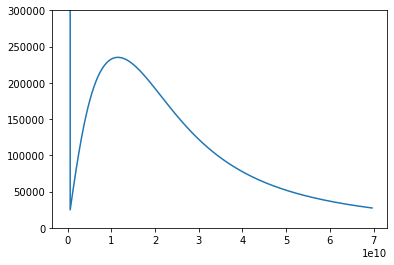

In [18]:
# sense check I understand what's happening
di.g = g_univ*np.exp(di.lnq)*di.msun/di.rr**2
plt.plot(di.rr, di.g)
plt.ylim(0,3e5)

In [19]:
# okay looks fine (except at r=0)

In [20]:
di.tmp = profs2[2]
di.prs = profs2[3]
di.rho = profs2[4]
di.xfrac = profs2[5] # hydrogen per mass
di.lum = profs2[6]
di.opa = profs2[7]
di.eps = profs2[8] # nuclear generation rate
di.gam1 = profs2[9] # first adiabatic exponent (dlnp/dlnrho)_ad
di.gamad = profs2[10] # adiabatic gradient
di.delta = profs2[11] # coeff. vol. expansion: -(dlnrho/dlnT)_p
di.cp = profs2[12] # pressure specific heat
di.mue = 1./profs2[13] # mean mol. weight of electrons
amu = 1.66054e-24
di.ne = 1/(amu*di.mue)
di.dsdr = di.cp/di.rr*profs2[14]
di.zfrac = profs[16]

In [21]:
f = open("Model_S.pkl", "wb")
pickle.dump(di.copy(), f, protocol=4)
f.close()